<a href="https://colab.research.google.com/github/Shivam-0205/demo/blob/main/Assignmnet_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
Student_ID = [f"S{str(i).zfill(3)}" for i in range(1, 101)]
Age = np.random.randint(17, 26, size=100)
Gender = np.random.choice(["Male", "Female"], size=100)
Department = np.random.choice(["AI", "DS", "IT", "EXTC", "MECH"], size=100)
CGPA = np.round(np.random.uniform(4.0, 10.0, size=100), 2)
Internship = np.random.randint(0, 4, size=100)

import pandas as pd
df = pd.DataFrame({
    "StudentID": Student_ID,
    "Age": Age,
    "Gender": Gender,
    "Department": Department,
    "CGPA": CGPA,
    "InternshipsCompleted": Internship
})


CGPA_array = df["CGPA"].values
CGPA_Normalized = (CGPA_array - CGPA_array.min()) / (CGPA_array.max() - CGPA_array.min())
df["CGPA_Normalized"] = CGPA_Normalized

def z_score(array):
    mean = np.mean(array)
    std = np.std(array)
    return (array - mean) / std

print(df)

   StudentID  Age  Gender Department  CGPA  InternshipsCompleted  \
0       S001   19    Male         IT  6.63                     0   
1       S002   22    Male         AI  5.66                     0   
2       S003   22  Female         AI  8.47                     2   
3       S004   24  Female         AI  9.81                     3   
4       S005   18    Male         AI  8.23                     2   
..       ...  ...     ...        ...   ...                   ...   
95      S096   19  Female       EXTC  8.84                     0   
96      S097   23  Female         DS  6.91                     0   
97      S098   25    Male         AI  7.37                     2   
98      S099   20    Male       EXTC  4.07                     1   
99      S100   21    Male       EXTC  4.55                     1   

    CGPA_Normalized  
0          0.432432  
1          0.268581  
2          0.743243  
3          0.969595  
4          0.702703  
..              ...  
95         0.805743  
96     

In [ ]:
threshold_top10 = np.percentile(CGPA_array, 90)
top_10_and_young = (CGPA_array >= threshold_top10) & (df["Age"].values < 22)
df["Top10%_And_Under22"] = top_10_and_young
print(df[df["Top10%_And_Under22"]])

   StudentID  Age  Gender Department  CGPA  InternshipsCompleted  \
8       S009   19    Male         DS  9.45                     2   
40      S041   17    Male         DS  9.78                     3   
81      S082   17  Female       MECH  9.61                     3   

    CGPA_Normalized  Top10%_And_Under22  
8          0.908784                True  
40         0.964527                True  
81         0.935811                True  


In [ ]:
nan_indices = np.random.choice(df.index, 20, replace=False)
df.loc[nan_indices, "CGPA"] = np.nan

print("Rows where CGPA is as NaN")
print(df.loc[nan_indices, ["StudentID", "Department", "CGPA"]])

df["CGPA"] = df.groupby("Department")["CGPA"].transform(lambda x: x.fillna(x.mean()))

print("\nRows after filling the NaN values:")
print(df.loc[nan_indices, ["StudentID", "Department", "CGPA"]])

print("\nRemaining NaN values in CGPA column:", df["CGPA"].isnull().sum())


Rows where CGPA is as NaN
   StudentID Department  CGPA
59      S060       EXTC   NaN
47      S048         AI   NaN
32      S033       EXTC   NaN
15      S016         IT   NaN
61      S062       EXTC   NaN
51      S052         DS   NaN
13      S014         AI   NaN
11      S012       MECH   NaN
37      S038         AI   NaN
26      S027       MECH   NaN
80      S081         DS   NaN
91      S092         AI   NaN
74      S075         AI   NaN
34      S035       MECH   NaN
21      S022       EXTC   NaN
94      S095       MECH   NaN
16      S017         IT   NaN
79      S080         DS   NaN
85      S086         IT   NaN
78      S079         AI   NaN

Rows after filling the NaN values:
   StudentID Department      CGPA
59      S060       EXTC  6.717143
47      S048         AI  6.932222
32      S033       EXTC  6.717143
15      S016         IT  6.548500
61      S062       EXTC  6.717143
51      S052         DS  7.082500
13      S014         AI  6.932222
11      S012       MECH  6.740000
37

In [ ]:
# This is done to verify that all other original (non-NaN) CGPA values remain unchanged
df.to_csv('processed_intern_data.csv', index=False)
from google.colab import files
files.download('processed_intern_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["Eligible for Placement"] = (df["CGPA"] >= 7.0) & (df["InternshipsCompleted"] >= 1)

def age_group(age):
    if 17 <= age <= 19:
        return "17-19"
    elif 20 <= age <= 22:
        return "20-22"
    else:
        return "23-25"

df["AgeGroup"] = df["Age"].apply(age_group)

print("Eligible for Placement and AgeGroup columns:\n")
print(df[["StudentID", "CGPA", "Eligible for Placement", "AgeGroup"]].head(15))


Eligible for Placement and AgeGroup columns:

   StudentID     CGPA  Eligible for Placement AgeGroup
0       S001  8.48000                    True    23-25
1       S002  7.69000                    True    23-25
2       S003  7.27000                    True    20-22
3       S004  7.28125                    True    23-25
4       S005  7.72000                    True    17-19
5       S006  5.18000                   False    23-25
6       S007  9.82000                   False    20-22
7       S008  6.38000                   False    17-19
8       S009  4.85000                   False    17-19
9       S010  9.77000                    True    23-25
10      S011  7.28125                    True    17-19
11      S012  7.85000                    True    20-22
12      S013  4.01000                   False    20-22
13      S014  8.32000                    True    23-25
14      S015  7.28125                   False    20-22


In [ ]:
df.to_csv('processed_intern_data.csv', index=False)
from google.colab import drive
from google.colab import files
files.download('processed_intern_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Number of students in each department:\n")
print(df["Department"].value_counts().to_string())

print("\nAverage CGPA per department:\n")
print(df.groupby("Department")["CGPA"].mean().round(2).to_string())

print("\nDepartment with highest placement eligibility ratio:\n")
placement_ratio = df.groupby("Department")["Eligible for Placement"].mean()
top_dept = placement_ratio.idxmax()
print(f"{top_dept} ({placement_ratio[top_dept]*100:.2f}% eligible)")

print("\nAverage internships completed per age group:\n")
print(df.groupby("AgeGroup")["InternshipsCompleted"].mean().round(2).to_string())

print("\nTop 10 students by CGPA (sorted by internships):\n")
top_10 = df.sort_values(by=["CGPA", "InternshipsCompleted"], ascending=[False, False]).head(10)
print(top_10[["StudentID", "CGPA", "InternshipsCompleted"]].to_string(index=False))



Number of students in each department:

Department
MECH    25
IT      24
EXTC    18
DS      17
AI      16

Average CGPA per department:

Department
AI      7.17
DS      7.01
EXTC    6.56
IT      7.19
MECH    6.98

Department with highest placement eligibility ratio:

IT (45.83% eligible)

Average internships completed per age group:

AgeGroup
17-19    0.83
20-22    1.26
23-25    1.37

Top 10 students by CGPA (sorted by internships):

StudentID  CGPA  InternshipsCompleted
     S060  9.99                     1
     S089  9.90                     3
     S054  9.87                     0
     S070  9.84                     0
     S015  9.65                     1
     S059  9.48                     2
     S086  8.85                     2
     S095  8.82                     3
     S006  8.57                     2
     S093  8.44                     0


<Figure size 800x600 with 0 Axes>

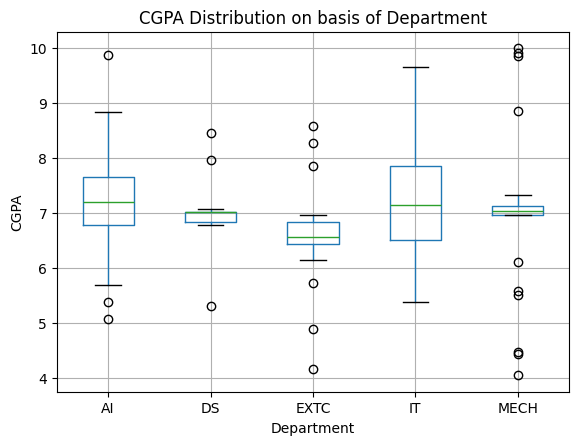

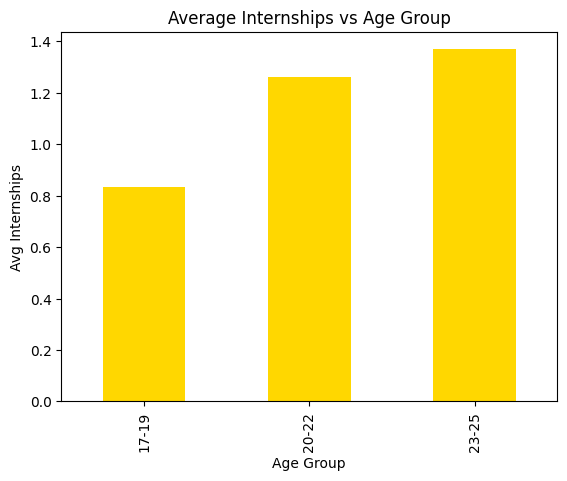

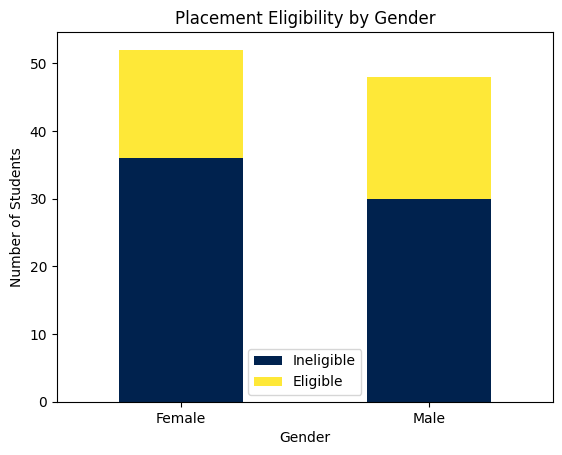

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.boxplot(column="CGPA", by="Department")
plt.title("CGPA Distribution on basis of Department")
plt.ylabel("CGPA")
plt.xlabel("Department")
plt.suptitle("")
plt.show()

avg_internships = df.groupby("AgeGroup")["InternshipsCompleted"].mean()
avg_internships.plot(kind="bar", color="gold")
plt.title("Average Internships vs Age Group")
plt.ylabel("Avg Internships")
plt.xlabel("Age Group")
plt.show()

eligibility = df.groupby(["Gender", "Eligible for Placement"]).size().unstack().fillna(0)
eligibility.plot(kind="bar", stacked=True, colormap="cividis")
plt.title("Placement Eligibility by Gender")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.legend(["Ineligible", "Eligible"])
plt.show()


In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

df = pd.read_csv('intern_data.csv')
df.head()


Saving intern_data.csv to intern_data.csv


,Name,Age,Department,Score,Gender,City
0,Shivam,19,AIDS,92,Male,Mumbai
1,Sohom,20,IT,95,Male,Pune
2,Shweta,19,AIDS,87,Female,Mumbai
3,Sanjeevani,18,COMPS,81,Female,Mumbai
4,Shivang,17,IT,76,Male,Delhi


In [ ]:
df['Status'] = df['Score'].apply(lambda x: 'Pass' if x >= 75 else 'Fail')
df.head()

,Name,Age,Department,Score,Gender,City,Status
0,Shivam,19,AIDS,92,Male,Mumbai,Pass
1,Sohom,20,IT,95,Male,Pune,Pass
2,Shweta,19,AIDS,87,Female,Mumbai,Pass
3,Sanjeevani,18,COMPS,81,Female,Mumbai,Pass
4,Shivang,17,IT,76,Male,Delhi,Pass


In [ ]:
df.to_csv('processed_intern_data.csv', index=False)
files.download('processed_intern_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
destination_path = os.path.join(folder_path, 'processed_intern_data.csv')
df.to_csv(destination_path, index=False)
print(f"Saved to: {destination_path}")


Saved to: /content/drive/MyDrive/Colab Notebooks/processed_intern_data.csv


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/processed_intern_data.csv'
df_from_drive = pd.read_csv(file_path)
print("Number of records:", len(df_from_drive))


Number of records: 16


In [ ]:
json_path = '/content/drive/MyDrive/Colab Notebooks/processed_intern_data.json'
df_from_drive.to_json(json_path, orient='records', lines=True)
print(f"JSON file saved to {json_path}")


JSON file saved to /content/drive/MyDrive/Colab Notebooks/processed_intern_data.json


In [ ]:
excel_path = '/content/drive/MyDrive/Colab Notebooks/processed_intern_data.xlsx'
df_from_drive.to_excel(excel_path, index=False)
print(f"Excel file saved to {excel_path}")


Excel file saved to /content/drive/MyDrive/Colab Notebooks/processed_intern_data.xlsx


In [ ]:
import zipfile
import pandas as pd

csv_filename = 'processed_intern_data.csv'
df_from_drive.to_csv(csv_filename, index=False)

zip_filename = 'processed_intern_data.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(csv_filename)

with zipfile.ZipFile(zip_filename) as zipf:
    with zipf.open(csv_filename) as file:
        df_from_zip = pd.read_csv(file)

print("CSV read from ZIP:")
print(df_from_zip.head())


CSV read from ZIP:
         Name  Age Department  Score  Gender    City Status
0      Shivam   19       AIDS     92    Male  Mumbai   Pass
1       Sohom   20         IT     95    Male    Pune   Pass
2      Shweta   19       AIDS     87  Female  Mumbai   Pass
3  Sanjeevani   18      COMPS     81  Female  Mumbai   Pass
4     Shivang   17         IT     76    Male   Delhi   Pass
